In [5]:
!pip3 install qiskit-aer
!pip3 install qiskit-ibm-runtime
!pip3 install qiskit[visualization] 
!pip3 install jupyter

  Using cached pydot-3.0.4-py3-none-any.whl.metadata (10 kB)
  Using cached pylatexenc-2.10.tar.gz (162 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.0 MB 7.1 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.0 MB 7.1 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.0 MB 7.1 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.0 MB 7.1 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.0 MB 7.1 M

  Using cached async_lru-2.0.4-py3-none-any.whl.metadata (4.5 kB)
  Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached jupyterlab_pygments-0.3.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached argon2_cffi-23.1.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached arrow-1.3.0-py3-none-any.whl.metadata (7.5 kB)
   ---------------------------------------- 0.0/11.7 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.7 MB 7.1 MB/s eta 0:00:02
   --------- ------------------------------ 2.9/11.7 MB 7.0 MB/s eta 0:00:02
   ------------- -------------------------- 3.9/11.7 MB 6.5 MB/s eta 0:00:02
   ----------------- ---------------------- 5.2/11.7 MB 6.3 MB/s eta 0:00:02
   ----------------------- ---------------- 6.8/11.7 MB 6.5 MB/s eta 0:00:01
   --------------------------- ------------ 8.1/11.7 MB 6.4 MB/s eta 0:00:01
   -------------------------------- ------- 9.4/11.7 MB 6.

In [7]:
import qiskit
qiskit.__version__

'1.3.1'

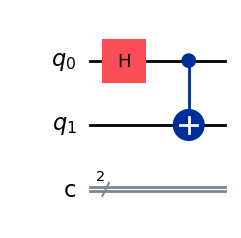

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2,2) #First
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

In [17]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ, ZI, IZ, XX, XI, IX]

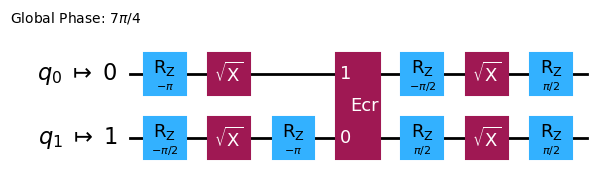

In [18]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# If you have not previously saved your credentials, follow instructions at
# https://docs.quantum.ibm.com/guides/setup-channel#iqp
# to authenticate with your API token.
service = QiskitRuntimeService()
 
backend = service.least_busy(simulator=False, operational=True)
 
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
isa_circuit.draw("mpl", idle_wires=False)


__ISA Circuits__: circuits are considered to be written in terms of that backend

__generate_preset_pass_manager__: Generates a pre-configured pass manager tailored for the given backend. The _optimization_level=1_ applies a moderate level of circuit optimization (e.g., reducing gate count or depth).

# Pre-Configured Pass Manager
A pre-configured pass manager is a set of predefined, reusable optimization and transformation routines that are applied to a quantum circuit to prepare it for execution on a specific quantum backend (e.g., hardware or simulator). It is designed to streamline and optimize the compilation process, making it easier to achieve efficient and error-resilient execution.

## Key Features of a Pre-Configured Pass Manager
Backend Specificity: Tailored to the properties and constraints of a particular quantum backend (e.g., IBM Quantum hardware). It considers factors like qubit connectivity, gate fidelity, and native gate sets.
### Optimization Levels: Typically offers multiple levels of optimization to balance speed and resource utilization against fidelity and execution time:
 1. Level 0: Minimal transformations, primarily converting the circuit into a runnable format for the backend.
 2. Level 1: Basic optimizations like reducing redundant gates and simple reordering of operations.
 3. Level 2: More advanced optimizations, including qubit routing and combining multiple operations into fewer gates.
 4. Level 3: Aggressive optimizations that may increase compilation time but maximize efficiency.
### Pipeline of Passes: Executes a sequence of passes (individual optimization steps) on the circuit. These passes may include:
1. Gate fusion (combining consecutive gates of the same type).
2. Noise-aware optimizations (minimizing gate errors based on hardware calibration data).
3. Qubit routing (mapping logical qubits to physical qubits).
4. Gate basis translation (converting gates into those natively supported by the backend).
### Why Use a Pre-Configured Pass Manager?
1. Ease of Use: You don't need to manually specify each optimization or transformation. The pass manager provides a ready-to-use pipeline.
2. Backend Optimization: Ensures the circuit is compatible with the backend's capabilities, improving the likelihood of successful execution.
3. Performance Improvement: Reduces the gate count, circuit depth, and qubit swaps, minimizing execution time and error rates.

## Estimator
An instance for calculating expectation values of quantum observables. It runs on the specified backend.

In [19]:
# Construct the Estimator instance.
 
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000

__resilience_level=1__: Configures basic error mitigation during execution to improve accuracy.

__default_shots=5000__: Specifies the number of measurement shots (repetitions) per circuit execution.

In [20]:
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

__mapped_observables__: Observables are adjusted to match the qubit layout of the optimized circuit (isa_circuit).

__observable.apply_layout__: Applies the circuit's qubit layout to the observables for proper alignment during estimation.

In [23]:

 
# One pub, with one circuit to run against five different observables.
job = estimator.run([(isa_circuit, mapped_observables)])
 
# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()
 
# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job.result()[0]



>>> Job ID: cy222xb9b62g008h7yhg


In [ ]:
 
# Use the following code instead if you want to run on a simulator:
 
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
backend = FakeAlmadenV2()
estimator = Estimator(backend)


__FakeAlmadenV2__: A simulated quantum backend designed to mimic the behavior and constraints of the real IBM Q Almaden quantum processor. It provides a testing environment without requiring access to physical quantum hardware.

In [ ]:
# Convert to an ISA circuit and layout-mapped observables.
 
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
job = estimator.run([(isa_circuit, mapped_observables)])
result = job.result()
 
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
 
job_result = job.result()
 
# This is the result from our single pub, which had five observables,
# so contains information on all five.
 
pub_result = job.result()[0]